<a href="https://colab.research.google.com/github/harshysyrup/CODSOFT/blob/main/Project001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK-1:MOVIE RATING PREDICTION**

Author: Harsh Surana

Batch:April

Domain:Data Science

Aim: Build a model taht predicts the rating of a movie based on features like genere,director and actors.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
read_data = pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv', encoding='latin1', sep=',', engine='python')
read_data.columns = ['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2','Actor 3']
read_data.dropna(inplace=True)
read_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
missing_values = read_data.isnull().sum()
print("Missing values:\n", missing_values)

# Decide how to handle missing values
# If there are only a few missing values, you can impute them with mean, median, or mode
# If there are many missing values in a column, consider removing the column or using advanced imputation techniques

Missing values:
 Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [ ]:

genre_split = read_data['Genre'].str.split(', ', expand=True)

genre_split.columns = [f'Genre_{i+1}' for i in range(genre_split.shape[1])]

read_data_with_genres = pd.concat([read_data, genre_split], axis=1)

read_data_with_genres.drop(columns=['Genre'], inplace=True)


print(read_data_with_genres)


                                     Name    Year Duration  Rating  Votes  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min     7.0      8   
3                                 #Yaaram  (2019)  110 min     4.4     35   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min     4.7    827   
6                               ...Yahaan  (2005)  142 min     7.4  1,086   
8                      ?: A Question Mark  (2012)   82 min     5.6    326   
...                                   ...     ...      ...     ...    ...   
15493                              Zubaan  (2015)  115 min     6.1    408   
15494                            Zubeidaa  (2001)  153 min     6.2  1,496   
15503                     Zulm Ki Zanjeer  (1989)  125 min     5.8     44   
15505                               Zulmi  (1999)  129 min     4.5    655   
15508                        Zulm-O-Sitam  (1998)  130 min     6.2     20   

              Director          Actor 1                 Actor 2  \
1       

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


read_data_with_genres.fillna('0', inplace=True)
read_data_with_genres.replace('None', '0', inplace=True)


read_data_with_genres['Genre_1'] = label_encoder.fit_transform(read_data_with_genres['Genre_1'].astype(str))
read_data_with_genres['Genre_2'] = label_encoder.fit_transform(read_data_with_genres['Genre_2'].astype(str))
read_data_with_genres['Genre_3'] = label_encoder.fit_transform(read_data_with_genres['Genre_3'].astype(str))
read_data_with_genres['Director'] = label_encoder.fit_transform(read_data_with_genres['Director'].astype(str))
read_data_with_genres['Actor 1'] = label_encoder.fit_transform(read_data_with_genres['Actor 1'].astype(str))
read_data_with_genres['Actor 2'] = label_encoder.fit_transform(read_data_with_genres['Actor 2'].astype(str))
read_data_with_genres['Actor 3'] = label_encoder.fit_transform(read_data_with_genres['Actor 3'].astype(str))
read_data_with_genres['Name'] = label_encoder.fit_transform(read_data_with_genres['Name'].astype(str))


print(read_data_with_genres)


       Name    Year Duration  Rating  Votes  Director  Actor 1  Actor 2  \
1         0  (2019)  109 min     7.0      8       629     1352     2272   
3         1  (2019)  110 min     4.4     35      1335     1198      719   
5         3  (1997)  147 min     4.7    827      1530      378       75   
6         4  (2005)  142 min     7.4  1,086      2044      692     1112   
8        76  (2012)   82 min     5.6    326       135     1934     1175   
...     ...     ...      ...     ...    ...       ...      ...      ...   
15493  5380  (2015)  115 min     6.1    408      1223     1861     1801   
15494  5381  (2001)  153 min     6.2  1,496      2059      763     1619   
15503  5382  (1989)  125 min     5.8     44      1793      406      754   
15505  5384  (1999)  129 min     4.5    655      1025      112     2164   
15508  5383  (1998)  130 min     6.2     20       895      468      753   

       Actor 3  Genre_1  Genre_2  Genre_3  
1          319       17        0        0  
3         2

In [ ]:

numerical_columns = read_data_with_genres.select_dtypes(include=['int', 'float']).columns

print(numerical_columns)


Index(['Name', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3',
       'Genre_1', 'Genre_2', 'Genre_3'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler



numerical_columns = ['Name', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3',
       'Genre_1', 'Genre_2', 'Genre_3']

scaler = StandardScaler()


read_data_with_genres[numerical_columns] = scaler.fit_transform(read_data_with_genres[numerical_columns])

print(read_data_with_genres)


           Name    Year Duration    Rating  Votes  Director   Actor 1  \
1     -1.724458  (2019)  109 min  0.797561      8 -0.848868  0.681672   
3     -1.723815  (2019)  110 min -1.085074     35  0.179330  0.409029   
5     -1.722527  (1997)  147 min -0.867846    827  0.463323 -1.042707   
6     -1.721884  (2005)  142 min  1.087198  1,086  1.211898 -0.486798   
8     -1.675544  (2012)   82 min -0.216165    326 -1.568316  1.712051   
...         ...     ...      ...       ...    ...       ...       ...   
15493  1.738162  (2015)  115 min  0.145880    408  0.016217  1.582811   
15494  1.738805  (2001)  153 min  0.218289  1,496  1.233743 -0.361099   
15503  1.739449  (1989)  125 min -0.071347     44  0.846349 -0.993136   
15505  1.740736  (1999)  129 min -1.012664    655 -0.272145 -1.513636   
15508  1.740092  (1998)  130 min  0.218289     20 -0.461473 -0.883370   

        Actor 2   Actor 3   Genre_1   Genre_2   Genre_3  
1      1.633592 -1.329341  0.953264 -1.117595 -0.726658  
3     -

In [ ]:

feature_names = read_data_with_genres.columns.tolist()


print("Feature Names:")
for feature in feature_names:
    print(feature)


Feature Names:
Name
Year
Duration
Rating
Votes
Director
Actor 1
Actor 2
Actor 3
Genre_1
Genre_2
Genre_3


In [ ]:

read_data_with_genres['Year'] = read_data_with_genres['Year'].str.extract('(\d+)').astype(int)


In [ ]:

read_data_with_genres['Duration'] = read_data_with_genres['Duration'].str.extract('(\d+)').astype(float)


In [ ]:

read_data_with_genres['Votes'] = pd.to_numeric(read_data_with_genres['Votes'], errors='coerce')


read_data_with_genres['Votes'].fillna(0, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = read_data_with_genres.drop(columns=['Rating'])
y = read_data_with_genres['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf = RandomForestRegressor()


rf.fit(X_train, y_train)

predictions = rf.predict(X_test)


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.6405759411300322


In [ ]:

linear_reg_model = LinearRegression()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()


linear_reg_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:

linear_reg_preds = linear_reg_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
gradient_boosting_preds = gradient_boosting_model.predict(X_test)

linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
random_forest_mae = mean_absolute_error(y_test, random_forest_preds)
gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_preds)

print("Mean Absolute Error (Linear Regression):", linear_reg_mae)
print("Mean Absolute Error (Random Forest Regression):", random_forest_mae)
print("Mean Absolute Error (Gradient Boosting Regression):", gradient_boosting_mae)

Mean Absolute Error (Linear Regression): 0.7509731933561644
Mean Absolute Error (Random Forest Regression): 0.6403977969907719
Mean Absolute Error (Gradient Boosting Regression): 0.6415685004138016


In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

gb_regressor = GradientBoostingRegressor()

grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)


grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)

best_gb_regressor = grid_search.best_estimator_

y_pred = best_gb_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (Best Gradient Boosting Regression):", mae)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean Absolute Error (Best Gradient Boosting Regression): 0.6309004895908842


In [ ]:

y_pred_test = best_gb_regressor.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error on Testing Data:", mae_test)



Mean Absolute Error on Testing Data: 0.6309004895908842


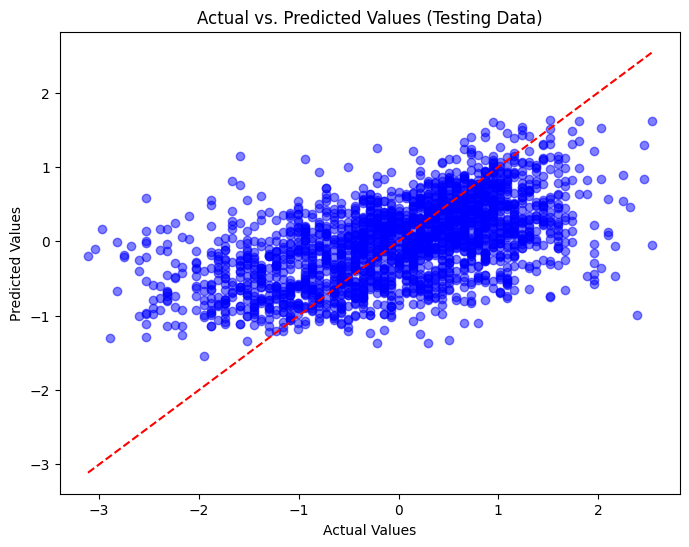

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Testing Data)')
plt.show()

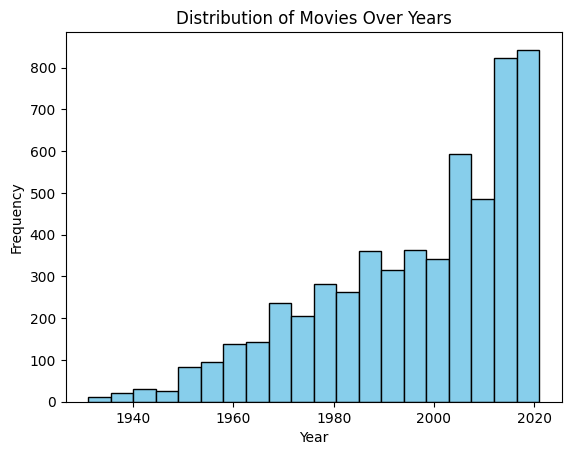

In [ ]:

plt.hist(read_data_with_genres['Year'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movies Over Years')
plt.show()


In [ ]:

mae_lr = 0.7509731933561644
mae_rf = 0.6403977969907719
mae_gb = 0.6415685004138016

accuracy_lr = 100 - mae_lr
accuracy_rf = 100 - mae_rf
accuracy_gb = 100 - mae_gb


print("Accuracy Percentage (Linear Regression): {:.2f}%".format(accuracy_lr))
print("Accuracy Percentage (Random Forest Regression): {:.2f}%".format(accuracy_rf))
print("Accuracy Percentage (Gradient Boosting Regression): {:.2f}%".format(accuracy_gb))


Accuracy Percentage (Linear Regression): 99.25%
Accuracy Percentage (Random Forest Regression): 99.36%
Accuracy Percentage (Gradient Boosting Regression): 99.36%


In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git config --global user.email "har.sur.rt21@dypatil.edu"
!git config --global user.name "harshysyrup"


In [ ]:
!git clone https://github.com/harshysyrup/CODSOFT.git


Cloning into 'CODSOFT'...
